# Clase Tutorial 3

En esta clase vamos a programar un perceptrón multicapa (MLP) usando Python. # TO-DO: completar

In [23]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [24]:
layers = [2,3,1]
bias = [np.random.randn(x, 1) for x in layers[1:]]
for l in range(len(layers)):
    print(l)

0
1
2


In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import NN_backprop
import numpy as np

# Create an instance of the MLP class
mlp = NN_backprop.MLP(layers=[2, 5, 1], activations=["relu", "linear"])

# Test initialization
print("Biases:")
for b in mlp.biases:
    print(b)
print("Weights:")
for w in mlp.weights:
    print(w)

# Test feedforward
x = [[1.0, 2.0],[1.0, 2.0],[1.0, 2.0]]  # Example input data
print(x)
y = [3.0,3.0,3.0]
a, z = mlp.forward_pass(x)
for i, layer_output in enumerate(a):
    print(f"a layer {i}:")
    print(layer_output)

for i, layer_output in enumerate(z):
    print(f"z=h(a) layer {i+1}:")
    print(layer_output)

Biases:
[[-0.20829876]
 [ 0.39600671]
 [-1.09306151]
 [-1.49125759]
 [ 0.4393917 ]]
[[1.11701629]]
Weights:
[[-0.67433266]
 [ 0.03183056]
 [-0.63584608]
 [ 0.67643329]
 [ 0.57659082]]
[[ 0.1666735   0.63503144  2.38314477  0.94447949 -0.91282223]]
[[1.0], [1.0], [1.0]]
Aca loggeo weights, x entrada y bias
[array([[-0.67433266],
       [ 0.03183056],
       [-0.63584608],
       [ 0.67643329],
       [ 0.57659082]]), array([[ 0.1666735 ,  0.63503144,  2.38314477,  0.94447949, -0.91282223]])] 
 [array([[1., 1., 1.]])] 
 [array([[-0.20829876],
       [ 0.39600671],
       [-1.09306151],
       [-1.49125759],
       [ 0.4393917 ]]), array([[1.11701629]])]
Tipos
<class 'list'> 
 <class 'list'> 
 <class 'list'>
a layer 0:
[[-0.88263142 -0.88263142 -0.88263142]
 [ 0.42783727  0.42783727  0.42783727]
 [-1.72890759 -1.72890759 -1.72890759]
 [-0.8148243  -0.8148243  -0.8148243 ]
 [ 1.01598252  1.01598252  1.01598252]]
a layer 1:
[[0.46129498 0.46129498 0.46129498]]
z=h(a) layer 1:
[[1. 1. 1.]]
z

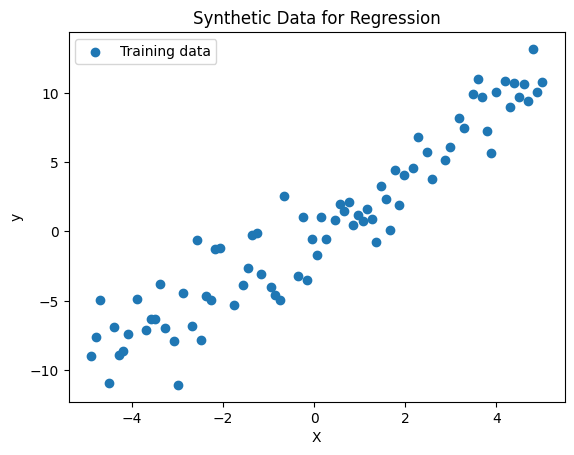

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.linspace(-5, 5, 100)
y = 2 * X + np.random.normal(scale=2, size=X.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Plot the training data
plt.scatter(X_train, y_train, label='Training data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Regression')
plt.legend()
plt.show()

In [55]:
num_layers = 5
for i in range(num_layers-1, 0, -1):
    print(i)

4
3
2
1


In [64]:
def getActivationFunction(name):
    if(name == 'sigmoid'):
        return lambda x : np.exp(x)/(1+np.exp(x))
    elif(name == 'linear'):
        return lambda x : x
    elif(name == 'relu'):
        return lambda x: np.maximum(x,0)
    else:
        print('Unknown activation function. Linear is used by default.')
        return lambda x: x
    
def getDerivitiveActivationFunction(name):
    if(name == 'sigmoid'):
        sig = lambda x : np.exp(x)/(1+np.exp(x))
        return lambda x :sig(x)*(1-sig(x)) 
    elif(name == 'linear'):
        return lambda x: 1
    elif(name == 'relu'):
        def relu_diff(x):
            y = np.copy(x)
            y[y>=0] = 1
            y[y<0] = 0
            return y
        return relu_diff
    else:
        print('Unknown activation function. Linear is used by default.')
        return lambda x: 1

In [63]:
layers = [1, 2, 1]
biases = [np.random.randn(y, 1) for y in layers[1:]]
weights = [np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])]
activations = ["relu", "linear"]

print("Biases")
print(biases)
print("Weights")
print(weights)

z_l = np.copy(1.0) # Activation of the first layer (x=z)
z = [z_l] # List to store all the activations, layer by layer
a = [] # List to store the preactivations, layer by layer

for l in range(1, len(layers)):
    # Preactivation in layer l "a(l) = W(l)z(l-1) + b(l)" 
    a_l = np.dot(weights[l-1], z[l-1]) + biases[l-1]
    a.append(np.copy(a_l))

    # Activation in layer l (z(l) = h(a(l)))
    h = getActivationFunction(activations[l-1])
    z_l = h(a_l)
    z.append(np.copy(z_l))

    print("a_l")
    print(a_l)
    
    print("Z_l")
    print(z_l)
    

print("A-l", a, "Z-l", z)

Biases
[array([[ 0.69938048],
       [-1.06122229]]), array([[-0.22247701]])]
Weights
[array([[-0.85891991],
       [ 0.05095428]]), array([[-1.79422927,  1.32646164]])]
a_l
[[-0.15953942]
 [-1.01026801]]
Z_l
[[0.]
 [0.]]
a_l
[[-0.22247701]]
Z_l
[[-0.22247701]]
A-l [array([[-0.15953942],
       [-1.01026801]]), array([[-0.22247701]])] Z-l [array(1.), array([[0.],
       [0.]]), array([[-0.22247701]])]


In [86]:
y = 2
h_prime = getDerivitiveActivationFunction(activations[-1])
delta = (y-z[-1])*h_prime(a[-1])

# Initialize gradients dy/dW and dy/db
nabla_b = [np.zeros(b.shape) for b in biases]
nabla_w = [np.zeros(w.shape) for w in weights]

# Insert output layer values
nabla_b[-1] = delta
nabla_w[-1] = np.dot(delta, z[-2].transpose())
print(nabla_b, "\n", nabla_w)

num_layers = len(layers)
# Calculate deltas for hidden layers -> Backpropagation of errors
for l in range(num_layers - 1, 0, -1):
    # Calculate ẟ for layer l
    h_prime = getDerivitiveActivationFunction(activations[l])
    delta = np.dot(weights[l].transpose(), delta) * h_prime(a[l])

    # Calculate gradients
    nabla_b[l] = delta
    nabla_w[l] = np.dot(delta[l], z[l-1].transpose())

[[2.22247701]]
[array([[0.],
       [0.]]), array([[2.22247701]])] 
 [array([[0.],
       [0.]]), array([[0., 0.]])]


IndexError: list index out of range

In [90]:
delta = [np.zeros(w.shape) for w in weights]
# Insert output layer error ẟ(L) is h'(a(L))** (z[-1] - y)
delta[-1] = (y-z[-1])*getDerivitiveActivationFunction(activations[-1])(a[-1])

# Initialize gradients dy/dW and dy/db
nabla_b = [np.zeros(b.shape) for b in biases]
nabla_w = [np.zeros(w.shape) for w in weights]
# Insert output layer values
nabla_b[-1] = delta[-1]
nabla_w[-1] = np.dot(delta[-1], z[-2].transpose())

# Calculate deltas for hidden layers -> Backpropagation of errors
for l in reversed(range(1, len(delta)-1)):
    # Calculate ẟ for layer l
    h_prime = getDerivitiveActivationFunction(activations[l])(a[l])
    delta[l] = np.dot(weights[l+1].transpose(), delta[l+1]) * h_prime

    # Calculate gradients
    nabla_b[l-1] = delta[l] 
    nabla_w[l-1] = np.dot(delta[l], z[l-1].transpose())

x.shape: (20,)
Weights [array([[-0.01114561],
       [ 0.0114989 ],
       [-0.83767804],
       [-0.5911831 ],
       [-0.66772029]]), array([[ 0.32486962,  0.99711798,  0.03060182, -0.06964158,  0.05157494]])] 
Z: [array([[ 0.55555556,  3.88888889, -2.37373737, -0.75757576,  1.96969697,
        -3.48484848, -0.95959596,  4.6969697 , -4.09090909,  2.27272727,
        -3.88888889, -0.25252525,  3.58585859, -2.17171717,  4.39393939,
        -4.49494949,  1.66666667,  1.56565657, -1.46464646, -3.38383838]])] 
Biases [array([[ 0.3269626 ],
       [ 0.33003511],
       [ 2.22594433],
       [ 1.37098901],
       [-0.50984324]]), array([[0.86727663]])]
w shape:(5, 1), Z shape: (1, 20)
shape al: (5, 20)
w shape:(1, 5), Z shape: (5, 20)
shape al: (1, 20)
loss = 27.830301473985966
x.shape: (20,)
Weights [array([[-0.01114561],
       [ 0.0114989 ],
       [-0.83767804],
       [-0.5911831 ],
       [-0.66772029]]), array([[ 0.32498506,  0.99715685,  0.03398836, -0.06729889,  0.0537337 ]])] 
Z: 

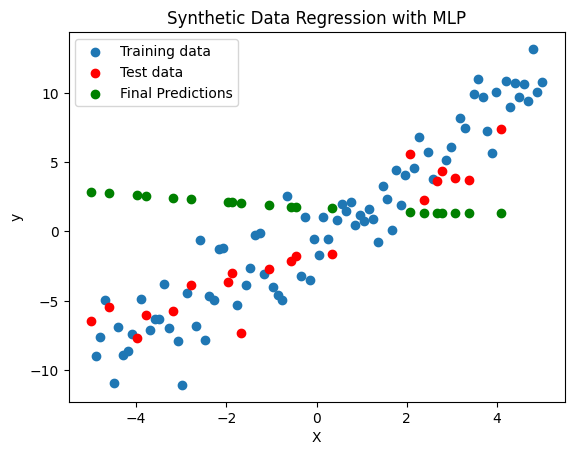

In [53]:
# Import the MLP class
from NN_backprop import MLP  # Make sure to replace 'your_module' with the actual module name

# Create an instance of the MLP class
mlp = MLP(layers=[1, 5, 1], activations=[ "relu", "linear"])

# Train the model
mlp.train(X_train, y_train, batch_size=20)

# Predict on the test set
y_pred = mlp.forward_pass(X_test)

# Extract the activation values z from y_pred
y_pred_activation = y_pred[1][-1].flatten()

# Plot the results using the activation values
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.scatter(X_test, y_pred_activation, color='green', label='Final Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data Regression with MLP')
plt.legend()
plt.show()

In [14]:
W = [[[ 0.77179055],
       [ 0.82350415],
       [ 2.16323595],
       [ 1.33652795],
       [-0.36918184]], 
       [[-0.02432612, -0.73803091,  0.2799246 , -0.09815039,  0.91017891]]] 

Z = [[ 0.55555556,  3.88888889, -2.37373737, -0.75757576,  1.96969697,
        -3.48484848, -0.95959596,  4.6969697 , -4.09090909,  2.27272727]]

b = [[-0.23937918],
       [ 1.0996596 ],
       [ 0.65526373],
       [ 0.64013153],
       [-1.61695604]], [[0.31721822]]

a = 0.77179055*0.55555556 -0.23937918
a


0.18939335120795794

In [36]:
a = np.array([np.array([1,2,3])])
b = [np.array([1,2,3]).reshape(-1,1)]

print(a)
#np.dot(a,b)


<class 'numpy.ndarray'>


In [39]:
import numpy as np

class MLP(object):

    def __init__(self, 
                 layers = [3,5,2],
                 activations = ["relu", "linear"],
                 lr = 1e-2, 
                 epochs = 100) -> None:
        """
        Constructor function for a MLP instance

        Inputs:
            layers: number of nodes in each layer of MLP
            activations: layers activation functions 
            lr: learning rate
            epochs: number of epochs to use during training
            
        """
        #self.lr = lr
        #self.epochs = epochs
        #self.loss = []
        assert len(layers) == len(activations) + 1, "Number of layers and activations mismatch" # Number of layers - 1 (input)= number of activation functions 
        self.layers = layers
        self.activations = activations

        """         
        The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers. 
        """
        self.biases = [np.random.randn(y, 1) for y in layers[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])]
        
    def feedforward(self, x):
        """
        Returns the output of the MLP if x is the input.
        """
        z = [np.copy(x)]
        a = [] # list to store the preactivations, layer by layer

        for l in range(1, len(self.layers)):
            # Preactivation in layer l "a(l) = W(l)z(l-1) + b(l)"
            a_l = np.dot(self.weights[l-1], z[l-1]) + self.biases[l-1]
            a.append(a_l)

            # Activation in layer l (z(l) = h(a(l)))
            h = self.getActivationFunction(self.activations[l-1])
            z.append(h(a_l))

        return z

    
    @staticmethod # It belongs to the class, not its instances. It does not require an instance for it to be called.
    def getActivationFunction(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(name == 'linear'):
            return lambda x : x
        elif(name == 'relu'):
            return lambda x: np.maximum(x,0)
        else:
            print('Unknown activation function. Linear is used by default.')
            return lambda x: x
        

# Create an instance of the MLP class
mlp = MLP(layers=[2, 3, 1], activations=["relu", "linear"])

# Test initialization
print("Biases:")
print(b.shape)
print(mlp.biases)
print("Weights:")
print(w.shape)
print(mlp.weights)

# Test feedforward
x_sample = np.array([[1.0], [2.0]])  # Example input data
output = mlp.feedforward(x_sample)
print("Output:")
for i,layer_output in enumerate(output):
    print(f" z Layer {i}:\n {layer_output}")

Biases:
(1, 1)
[array([[-0.24945858],
       [ 0.04949498],
       [ 0.49383678]]), array([[0.64331447]])]
Weights:
(1, 3)
[array([[-1.57062341, -0.20690368],
       [ 0.88017891, -1.69810582],
       [ 0.38728048, -2.25556423]]), array([[-1.02250684,  0.03863055, -1.6567151 ]])]
Output:
 z Layer 0:
 [[1.]
 [2.]]
 z Layer 1:
 [[0.]
 [0.]
 [0.]]
 z Layer 2:
 [[0.64331447]]


## Dataset

Utilizaremos un dataset de temperaturas desde 1970 hasta 2022.

In [3]:
data = pd.read_csv("../datasets/weather.csv", index_col=0)
data.head(10)

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.00,52.0
1970-01-02,52.0,39.0,0.00,52.0
1970-01-03,52.0,35.0,0.00,53.0
1970-01-04,53.0,36.0,0.00,52.0
1970-01-05,52.0,35.0,0.00,50.0
1970-01-06,50.0,38.0,0.00,52.0
1970-01-07,52.0,43.0,0.00,56.0
1970-01-08,56.0,49.0,0.24,54.0
1970-01-09,54.0,50.0,0.40,57.0
1970-01-10,57.0,50.0,0.00,57.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13509 entries, 1970-01-01 to 2022-11-26
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tmax           13498 non-null  float64
 1   tmin           13495 non-null  float64
 2   rain           13228 non-null  float64
 3   tmax_tomorrow  13498 non-null  float64
dtypes: float64(4)
memory usage: 527.7+ KB


In [5]:
# Fill in any missing values in the data with past values
data = data.ffill()

In [6]:
data.describe()

,tmax,tmin,rain,tmax_tomorrow
count,13509.000000,13509.000000,13509.000000,13509.000000
mean,66.057073,50.428677,0.045804,66.057369
std,8.328977,6.792531,0.180576,8.328832
min,38.000000,1.000000,0.000000,38.000000
25%,60.000000,46.000000,0.000000,60.000000
50%,66.000000,51.000000,0.000000,66.000000
75%,71.000000,56.000000,0.000000,71.000000
max,122.000000,69.000000,3.580000,122.000000


<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

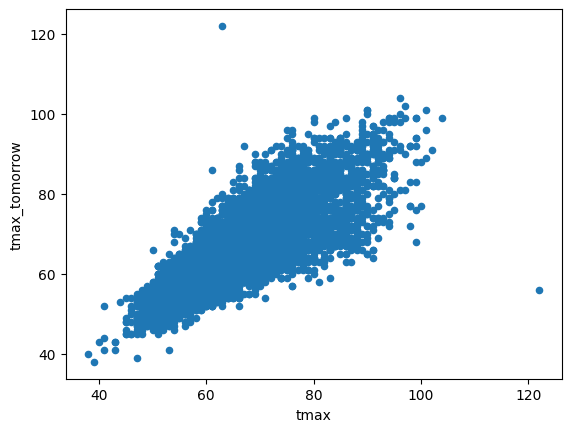

In [7]:
# Create a scatter plot of tmax and tmax_tomorrow
data.plot.scatter("tmax", "tmax_tomorrow")

## Regresión Lineal

Supongamos que queremos predecir la temperatura máxima de mañana (`tmax_tomorrow`) usando la temperatura máxima de hoy (`tmax`), la temperatura mínima de hoy (`tmin`) y cuanto llovió hoy (`rain`).

Llamaremos: 
* `tmax_tomorrow`: $y$, 
* `tmax`: $x_{1}$, 
* `tmin`: $x_{2}$,
* `rain`: $x_{3}$.

Podríamos usar una regresión lineal para predecir la temperatura máxima de mañana usando la ecuación: 

$$\hat{y}=w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{4} + b,$$

donde $\hat{y}$ es nuestra predicción para la `tmax_tomorrow`. Los valores $w$ son los pesos (weights) y $b$ es el bias.

#### 📝 Pruebe resolviendo este ejercicio usando una regresión lineal.

### Otro

## Introducción 

Existen varios frameworks que permiten desarrollar redes neuronales con facilidad, como son TensorFlow y PyTorch. Sin embargo, en esta clase comenzaremos programando una red neuronal desde cero para obtener un mayor entendimiento y una mejor intuición sobre como funcionan los algoritmos. En particular, vamos a implementar un perceptrón multicapa para una regresión solamente usando NumPy para hacer cálculos matemáticos.

## Perceptrón Multicapa y Backpropagation

* Un MLP (por sus siglas en inglés, Multilayer Perceptron) esta compuesta de una *input layer*, una o más *hidden layers* y una capa final llamada *output layer*.
* Cada capa (excepto la de salida) incluye una neurona de bias y esta totalmente conectada a la siguiente capa.
* La señal fluye en una sola dirección (desde los *inputs* hacia los *outputs*) por lo que se conoce a este tipo de arquitecturas como **feedforward neural network (FNN)**.
* Cuando se considera "deep" neural network? En los 90s, si tenía más de 2 hidden layers - pero ahora es común ver redes con más de 100 capas, entonces se perdió noción de este concepto. El término "deep" se refiere a que hay una pila profunda de cálculos matemáticos. En la actualidad, la mayoría de la gente habla de "Deep Learning" cuando hay redes neuronales involucradas (aún si son poco profundas).


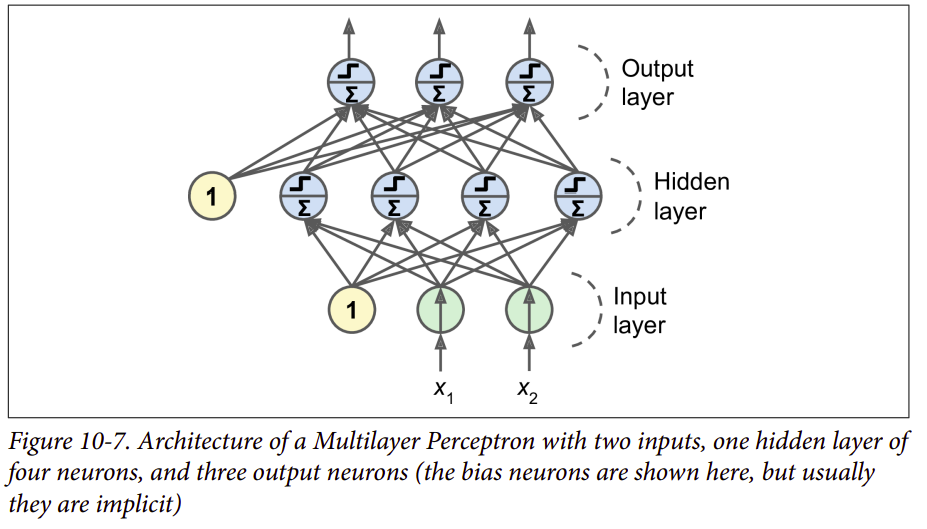

### ❓ ¿Cómo se entrena un MLP?

* Durante muchos años, los investigadores lucharon sin éxito por encontrar una manera de entrenar MLP.
* En 1986, David Rumelhart, Geoffrey Hinton y Ronald Williams publicaron un [innovador paper](https://www.semanticscholar.org/paper/Learning-representations-by-back-propagating-errors-Rumelhart-Hinton/052b1d8ce63b07fec3de9dbb583772d860b7c769) que introdujo el algoritmo de entrenamiento de retropropagación/backpropagation, que todavía se utiliza hoy en día.
* Basicamente es gradient descent usando una técnica para computar los gradientes de forma automática: con tan solo 2 pases a través de la red (uno hacia adelante y uno hacia atrás), backpropagation permite computar el gradiente del error de la red con respecto a cada parámetro en particular del modelo. En otras palabras, puede encontrar como cada peso y bias debe ser modificado de manera de reducir el error de salida. Una vez que tenemos los gradientes, simplemente se hace un proceso de gradient descent y todo el proceso se repite hasta que la red converge a una solución.

Hiperparámetros:

**Que es un batch?**
A training dataset can be divided into one or more batches.

When all training samples are used to create one batch, the learning algorithm is called batch gradient descent. When the batch is the size of one sample, the learning algorithm is called stochastic gradient descent. When the batch size is more than one sample and less than the size of the training dataset, the learning algorithm is called mini-batch gradient descent.

Batch Gradient Descent. Batch Size = Size of Training Set
Stochastic Gradient Descent. Batch Size = 1
Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set

**Que es un epoch?**
number times that the learning algorithm will work through the entire training dataset.
One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.

You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.

The number of epochs is traditionally large, often hundreds or thousands, allowing the learning algorithm to run until the error from the model has been sufficiently minimized. You may see examples of the number of epochs in the literature and in tutorials set to 10, 100, 500, 1000, and larger.

It is common to create line plots that show epochs along the x-axis as time and the error or skill of the model on the y-axis. These plots are sometimes called learning curves. These plots can help to diagnose whether the model has over learned, under learned, or is suitably fit to the training dataset.

#### Backpropagation https://www.linkedin.com/pulse/gradient-descent-backpropagation-ken-chen
Veamos el algoritmo con mayor detalle:
* Maneja un mini-batch a la vez (por ejemplo, con 32 instancias cada uno) y pasa por todo el conjunto de entrenamiento completo varias veces. Cada pase por la red se llama *epoch*.
* 

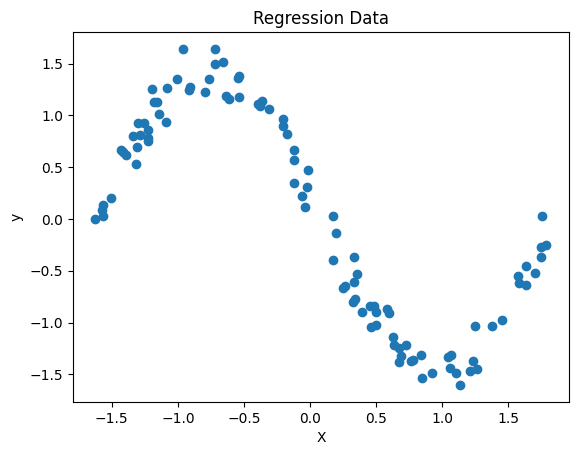

Epoch 0, Loss: 12.2804
Epoch 1000, Loss: 0.0259
Epoch 2000, Loss: 0.0198
Epoch 3000, Loss: 0.0196
Epoch 4000, Loss: 0.0196
Epoch 5000, Loss: 0.0196
Epoch 6000, Loss: 0.0196
Epoch 7000, Loss: 0.0196
Epoch 8000, Loss: 0.0196
Epoch 9000, Loss: 0.0196


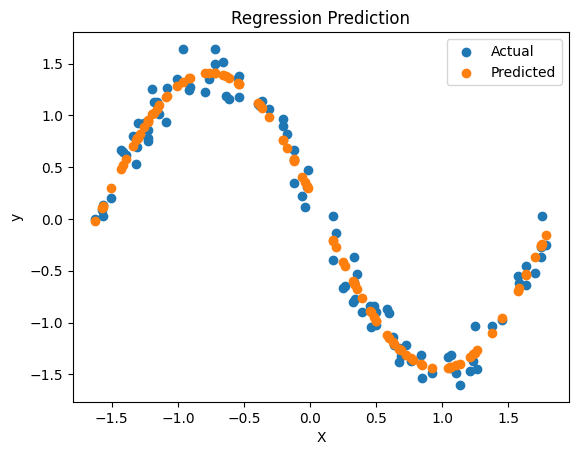

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample regression data
np.random.seed(0)
X = 2 * np.pi * np.random.rand(100, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)

# Normalize data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Plot the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Data')
plt.show()

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the MLP class
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.random.randn(1, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.random.randn(1, self.output_size)
        
    def forward(self, X):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        return self.output
    
    def backward(self, X, y, output, learning_rate):
        # Backpropagation
        error = y - output
        
        # Output layer gradients
        delta_output = error
        d_weights_hidden_output = np.dot(self.hidden_output.T, delta_output)
        d_bias_hidden_output = np.sum(delta_output, axis=0, keepdims=True)
        
        # Hidden layer gradients
        delta_hidden = np.dot(delta_output, self.weights_hidden_output.T) * sigmoid_derivative(self.hidden_output)
        d_weights_input_hidden = np.dot(X.T, delta_hidden)
        d_bias_input_hidden = np.sum(delta_hidden, axis=0, keepdims=True)
        
        # Update weights and biases
        self.weights_hidden_output += learning_rate * d_weights_hidden_output
        self.bias_hidden_output += learning_rate * d_bias_hidden_output
        self.weights_input_hidden += learning_rate * d_weights_input_hidden
        self.bias_input_hidden += learning_rate * d_bias_input_hidden
        
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backpropagation
            self.backward(X, y, output, learning_rate)
            
            # Calculate and print loss
            loss = np.mean(np.square(y - output))
            if epoch % 1000 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

# Define hyperparameters
input_size = 1
hidden_size = 8
output_size = 1
epochs = 10000
learning_rate = 0.01

# Create and train the MLP
mlp = MLP(input_size, hidden_size, output_size)
mlp.train(X, y, epochs, learning_rate)

# Plot the predicted values
predicted = mlp.forward(X)
plt.scatter(X, y, label='Actual')
plt.scatter(X, predicted, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Prediction')
plt.legend()
plt.show()


In [117]:
import nnet
from nnet import MLP

X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

y = np.array([0, 1, 1, 0])

net = nnet.MLP([4, 30, 1])
net.SGD([X,y], 30, 1, 3.0)

ValueError: too many values to unpack (expected 2)